In [1]:
#Notebook to run some computations of 2 Player Experience Weighted Attraction, MWU

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [32]:
a = 0.18
b = 1.41
r = -1.0
c = -10
eps = .5
1.0 - math.exp(c)

0.9999546000702375

In [50]:
A = np.array([[1.0, r],
             [r, 1.0]])

B = np.array([[r, 1.0],
             [1.0, r]])

In [51]:
# #Payoffs from PNAS paper for chaos
# A = np.array([[0.0, 0.5],
#              [6.0, -9.0]])

# B = np.array([[0.0, 0.45],
#              [6.0, -9.0]])

In [52]:
def getConstants( A,B ):
    a,b,c,d = A[0,0], A[0,1], A[1,0], A[1,1]
    e,g,f,h = B[0,0], B[0,1], B[1,0], B[1,1]
    return [1/4*(a+d-b-c), 1/4*(a+b-c-d), 1/4*(e+h-f-g), 1/4*(e+f-g-h)]

In [53]:
getConstants(A,B)

[1.0, 0.0, -1.0, 0.0]

In [54]:
A,B

(array([[ 1., -1.],
        [-1.,  1.]]),
 array([[-1.,  1.],
        [ 1., -1.]]))

In [55]:
e0 = np.array([1, 0])
e1 = np.array([0, 1])

In [56]:
#Learning dynamics
def EWA(X, a=.18, b=1.41):
    x,y = X
    x1, y1 = 1.0-x, 1.0-y
    Ay = np.matmul(A, np.array([y, y1]))
    Bx = np.matmul(B, np.array([x, x1]))
    #Update x
    XNum = math.pow(x, 1.0-a)*math.exp(b*np.matmul(e0,Ay))
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*np.matmul(e1,Ay))
    #Update y
    YNum = math.pow(y, 1.0-a)*math.exp(b*np.matmul(e0,Bx))
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*np.matmul(e1,Bx))
    return [XNum / XDenom, YNum / YDenom]
def EWA_Alt(X, a=.18, b=1.41):
    x,y = X
    x1, y1 = 1.0-x, 1.0-y
    Ay = np.matmul(A, np.array([y, y1]))
    #Update x
    XNum = math.pow(x, 1.0-a)*math.exp(b*np.matmul(e0,Ay))
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*np.matmul(e1,Ay))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    Bx = np.matmul(B, np.array([fx0, fx1]))
    YNum = math.pow(y, 1.0-a)*math.exp(b*np.matmul(e0,Bx))
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*np.matmul(e1,Bx))
    fy0 = YNum / YDenom
    return [fx0, fy0]
#Linear MWU
def MWU_Linear ( X, eps=.5 ):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Ay = np.matmul(A, np.array([y0, y1]))
    Bx = np.matmul(B, np.array([x0, x1]))
    XNum = 1.0 - eps*np.matmul(e0, Ay)
    XDenom = 1.0 - eps*np.matmul(np.array([x0,x1]), Ay)
    YNum = 1.0 - eps*np.matmul(e0, Bx)
    YDenom = 1.0 - eps*np.matmul(np.array([y0,y1]), Bx)
    return [x0*(XNum / XDenom), y0*(YNum/YDenom)]
def MWU ( X, c = -10 ):
    #  x0*(1-eps)^c(1) / (x0*(1-eps^c(1) + x1*(1-eps)^c(2))) 
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    Ay = np.matmul(A, np.array([y0, y1]))
    Bx = np.matmul(B, np.array([x0, x1]))
    #Update x
    XNum = x0 * math.exp(c*np.matmul(e0, Ay))
    XDenom = XNum + x1 * math.exp(c*np.matmul(e1, Ay))
    #Update y
    YNum = y0 * math.exp(c*np.matmul(e0, Bx))
    YDenom = YNum + y1 * math.exp(c*np.matmul(e1, Bx))
    return [XNum / XDenom, YNum / YDenom]
#Alternating MWU
def MWU_Alt ( X, c=-10 ):
    x0,y0 = X
    x1, y1 = 1.0-x0, 1.0-y0
    #Update x
    Ay = np.matmul(A, np.array([y0, y1]))
    XNum = x0 * math.exp(c*np.matmul(e0, Ay))
    XDenom = XNum + x1 * math.exp(c*np.matmul(e1, Ay))
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    #Update y
    Bfx = np.matmul(B, np.array([fx0, fx1]))
    YNum = y0 * math.exp(c*np.matmul(e0, Bfx))
    YDenom = YNum + y1 * math.exp(c*np.matmul(e1, Bfx))
    return [fx0, YNum / YDenom]
def EWA_Interpolate(X, gamma=0.0, a=.18, b=1.41):
    x,y = X
    x1, y1 = 1.0-x, 1.0-y
    Ay = np.matmul(A, np.array([y, y1]))
    Bx = np.matmul(B, np.array([x, x1]))
    #Update x
    XNum = math.pow(x, 1.0-a)
    XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*np.matmul(e1-e0,Ay))
    #Update y
    fx0 = XNum / XDenom
    fx1 = 1.0 - fx0
    Bfx = np.matmul(B, np.array([fx0, fx1]))
    Bgamma = (1.0-gamma)*Bx + gamma*Bfx
    YNum = math.pow(y, 1.0-a)
    YDenom = YNum + math.pow(y1,1.0-a)*math.exp(b*np.matmul(e1-e0,Bgamma))
    fy0 = YNum / YDenom
    return [fx0, fy0]

In [58]:
a = 0.18
b = 1.41
gamma = 1.0
N = 100

In [59]:
init = [.3,.3]
traj = [init]
X = init
for i in range(0,N):
    X = EWA(X,a,b)
    traj . append ( X )

In [60]:
init = [.7,.9]
traj1 = [init]
X = init
for i in range(0,N):
    X = EWA_Alt(X,a,b)
    traj1 . append ( X )

In [61]:
# init = [.3,.3]
# traj = [init]
# X = init
# for i in range(0,1000):
#     X = EWA_Alt(X,0.0,-0.6)
#     traj . append ( X )

In [62]:
# init = [.3,.3]
# traj = [init]
# X = init
# for i in range(0,1000):
#     X = MWU_Alt(X,-.25)
#     traj . append ( X )

In [63]:
#traj = traj[-1000:]

In [64]:
x,y = zip(*traj)

In [65]:
x1,y1 = zip(*traj1)

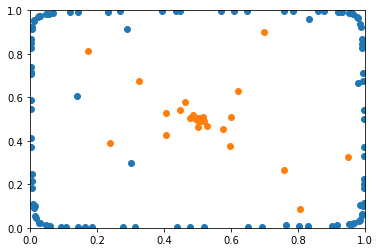

In [66]:
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(x,y)
plt.scatter(x1,y1)

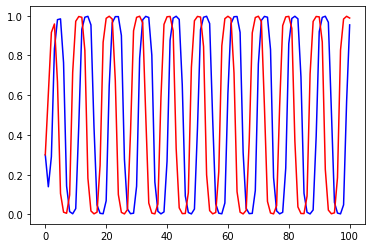

In [71]:
plt.plot(x, 'b', y, 'r')

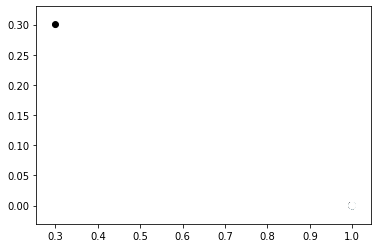

In [21]:
colors = cm.bone(np.linspace(0, 1, len(y)))
plt.scatter(x, y, color=colors)

In [22]:
x = np.array([.5,.5])
Bx = np.matmul(B,x)

#     XNum = math.pow(x, 1.0-a)*math.exp(b*np.matmul(e0,Ay))
#     XDenom = XNum + math.pow(x1,1.0-a)*math.exp(b*np.matmul(e1,Ay))
#     #Update y
#     fx0 = XNum / XDenom
#     fx1 = 1.0 - fx0
#     Bx = np.matmul(B, np.array([fx0, fx1]))

In [ ]:
def F(x,y, a=0.18, b=0.6):
    XNum = math.pow(x, 1.0-a)
    XDenom = XNum + math.pow(1-y,1.0-a)*math.exp(b*np.matmul(e1-e0,Bx))
    return XNum / XDenom

In [ ]:
def F(y, a=0.18, b=0.6):
    YNum = math.pow(y, 1.0-a)
    YDenom = YNum + math.pow(1-y,1.0-a)*math.exp(b*np.matmul(e1-e0,Bx))
    return YNum / YDenom
def G(y, a=0.18, b=0.6):
    #Have x,y
    #Update X
    Bx 
    YNum = math.pow(y, 1.0-a)
    YDenom = YNum + math.pow(1-y,1.0-a)*math.exp(b*np.matmul(e1-e0,Bx))
    return YNum / YDenom

In [ ]:
X = np.linspace(0,1,10)
Y = [F(x) for x in X]
X

In [ ]:
plt.plot(x, 'b', y, 'r')

In [ ]:
def translate(X):
    x,y = X
    x,y = x-0.5, y-0.5
    return [x,y]

In [ ]:
def getAngle ( X ):
    x,y = X
    D = math.sqrt(x**2+y**2)
    x = x / D
    y = y / D
    if y >= 0.0:
        theta = np.arccos(x)
    else:
        theta = np.arccos(x)+math.pi
    return theta

In [ ]:
domain = []
for X in zip(x,y):
    theta = getAngle(translate(X))
    domain.append(theta)
domain
X = domain[:-1]
angleMap = {}
for (i,d) in enumerate(X):
    angleMap[d] = domain[i+1]

In [ ]:
angleMap

In [ ]:
X.sort()

In [ ]:
X

In [ ]:
Y = []
for x in X:
    Y . append ( angleMap[x] )

In [ ]:
plt.plot(X,Y)

In [ ]:
alpha = 0.0
beta = 0.0
x,y = 0.0,1.0

In [ ]:
EWA([x,y], alpha, beta)